<a href="https://colab.research.google.com/github/DevanshD3/Clustering-Algorithms/blob/main/HDBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from numpy import unique
import seaborn as sns
pal = sns.color_palette('deep', 8)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.datasets import load_files

# for reproducibility
random_state = 0 

DATA_DIR = "/content/drive/MyDrive/Data/CV.csv"
df = pd.read_csv(DATA_DIR, low_memory= False)
df.head()

,Author ID,Modified Description,ID
0,27348,Simple latch with two cross-coupled NOR gates.,137750
1,47272,Laboratorio. Sesión 3.FUNDAMENTOS DE COMPUTADORES,229813
2,36805,This is a 7 segment display.,249268
3,36489,Este bloque les servirá para el examen parcial,232819
4,30771,The external clock is directly connected to al...,249264


In [ ]:
vec = TfidfVectorizer(stop_words='english')
df['Modified Description'] = df['Modified Description'].fillna('')
vec_matrix = vec.fit_transform(df['Modified Description'])
features = vec.transform(df['Modified Description'])
print(features)

  (0, 9931)	0.3227931164197924
  (0, 6506)	0.40802933946806075
  (0, 5173)	0.25773776809552934
  (0, 3263)	0.5611565857574715
  (0, 3210)	0.5899077820163157
  (1, 9795)	0.5201365271425246
  (1, 6467)	0.42967167566533615
  (1, 5089)	0.5634737543685681
  (1, 2935)	0.476799299916481
  (2, 9670)	0.7430862931318738
  (2, 3940)	0.6691956073970681
  (3, 9791)	0.4550963892643165
  (3, 8092)	0.36461795716737266
  (3, 8082)	0.244302462048003
  (3, 6588)	0.3533498829631091
  (3, 4595)	0.39183564968111356
  (3, 4539)	0.3236684347770153
  (3, 4269)	0.26231346757082874
  (3, 2196)	0.3850927183625514
  (4, 11477)	0.14436558388169132
  (4, 10812)	0.1821684703326401
  (4, 10764)	0.12804152439100075
  (4, 10465)	0.14092347226783963
  (4, 10225)	0.13382659950075762
  (4, 9902)	0.1595904952544354
  :	:
  (6028, 11637)	0.832091666124507
  (6028, 5150)	0.5546381335304505
  (6029, 10118)	0.5142487328997064
  (6029, 9847)	0.5142487328997064
  (6029, 4215)	0.34623771748932497
  (6029, 315)	0.2945575752224373
 

In [ ]:
# need to upgrade numpy for hdbscan
!pip install numpy==1.16.0

# install this first before hdbscan
!pip install Cython

!pip install hdbscan

import hdbscan


     |████████████████████████████████| 17.3MB 205kB/s 
ERROR: umap-learn 0.5.1 has requirement numpy>=1.17, but you'll have numpy 1.16.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.16.0 which is incompatible.
ERROR: pyarrow 3.0.0 has requirement numpy>=1.16.6, but you'll have numpy 1.16.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: astropy 4.2 has requirement numpy>=1.17, but you'll have numpy 1.16.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


     |████████████████████████████████| 6.4MB 7.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311714 sha256=8cdef00329ef4394399b06e3750648232100f46feb089955fb725ddc015acdb0
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [ ]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, prediction_data = True,gen_min_span_tree=True)
clusterer.fit(reduced_features)


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=True)

In [ ]:
test_labels, strengths = hdbscan.approximate_predict(clusterer,reduced_features)
strengths

array([0.        , 0.15222407, 1.        , ..., 0.        , 0.92785393,
       0.        ])

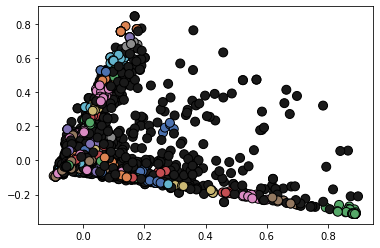

In [ ]:
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

pal = sns.color_palette('deep',len(clusterer.labels_))


colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,clusterer.probabilities_)]
test_colors = [pal[col] if col >= 0 else (0.1, 0.1, 0.1) for col in test_labels]
plt.scatter(reduced_features.T[0], reduced_features.T[1], c=test_colors, **plot_kwds);
plt.scatter(*reduced_features.T, c=test_colors, s=80, linewidths=1, edgecolors='k')

In [ ]:
from sklearn.mixture import GaussianMixture
# define the model
gaussian_model = GaussianMixture(n_components=2)

# train the model
gaussian_model.fit(reduced_features)

# assign each data point to a cluster
gaussian_result = gaussian_model.predict(reduced_features)

# get all of the unique clusters
gaussian_clusters = unique(gaussian_result)

# plot Gaussian Mixture the clusters
for gaussian_cluster in gaussian_clusters:
    # get data points that fall in this cluster
    index = where(gaussian_result == gaussian_clusters)
    # make the plot
    pyplot.scatter(reduced_features[index, 0], reduced_features[index, 1])

# show the Gaussian Mixture plot
pyplot.show()

NameError: ignored